In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



In [2]:
# Grab files with data
state_file= ("Research Data/State_median_income.csv")
birthplace_file= ("Research Data/birth_dataframe.csv")
salary_file= ("Research Data/NBAsalaries.csv")

# Read into state data and show dataframe
state_df= pd.read_csv(state_file)
state_df.head()

# Extract only state name, poverty %, and median household income columns
income_poverty_df= state_df[['Name', 'Poverty Percent, All Ages', 'Median Household Income']]

# Rename name column to state
income_poverty_df= income_poverty_df.rename(columns=({'Name': 'State'}))
income_poverty_df.head()
#income_poverty_df.dtypes

,State,"Poverty Percent, All Ages",Median Household Income
0,United States,13.1,61937.0
1,Alabama,16.8,49881.0
2,Alaska,11.1,74912.0
3,Arizona,14.1,59079.0
4,Arkansas,16.8,47094.0


In [3]:
birthplace_df= pd.read_csv(birthplace_file)
birthplace_df

,Player,Date,City,State
0,Aaron Gordon,Sep 16 1995,San Jose,California
1,Aaron Holiday,Sep 30 1996,Ruston,Louisiana
2,Alec Burks,Jul 20 1991,Grandview,Missouri
3,Alex Caruso,Feb 28 1994,College Station,Texas
4,Al-Farouq Aminu,Sep 21 1990,Atlanta,Georgia
...,...,...,...,...
351,Zach Collins,Nov 19 1997,Las Vegas,Nevada
352,Zach LaVine,Mar 10 1995,Renton,Washington
353,Zach Norvell,Dec 9 1997,Chicago,Illinois
354,Zhaire Smith,Jun 4 1999,Garland,Texas


In [4]:
salary_df= pd.read_csv(salary_file)
salary_df

,Player,2019-20
0,A.J. Hammons,350087
1,Aaron Gordon,19863636
2,Aaron Holiday,2239200
3,Abdel Nader,1618520
4,Admiral Schofield,898310
...,...,...
519,Zach Collins,4240200
520,Zach LaVine,19500000
521,Zach Norvell,50752
522,Zhaire Smith,3058800


In [5]:
#Merge Dataframes to get Players with their birth State, salary, state household income, and state poverty percent
merged_household= pd.merge(income_poverty_df, birthplace_df, how='inner', on= ('State'))
merged_household['Median Household Income']= merged_household['Median Household Income'].astype(int)
merged_salary= pd.merge(merged_household, salary_df, how='inner', on=('Player'))
merged_salary= merged_salary.rename(columns={'2019-20': 'Player Salary'})

state_groupby= merged_salary.groupby('State')
state_income= state_groupby['Median Household Income'].mean()


state_groupby_df= pd.DataFrame(state_income)
state_groupby_df['# of Players Birthstate']= state_groupby['Player'].count()


state_groupby_df['Cumulative Player Salary']= state_groupby['Player Salary'].sum()
state_groupby_df['Median Player Salary']= state_groupby['Player Salary'].median()
state_groupby_df['Poverty Percent']= state_groupby['Poverty Percent, All Ages'].mean()
state_groupby_df.sort_values(['# of Players Birthstate'],ascending=False, inplace=True)

state_groupby_df.to_csv("Research Data/state_calculations.csv", index=True)
state_groupby_df

,Median Household Income,# of Players Birthstate,Cumulative Player Salary,Median Player Salary,Poverty Percent
State,,,,,
California,75250,40,453153917,6137031.5,12.8
Texas,60632,27,187473037,3058800.0,14.9
Illinois,65063,25,143467198,1618520.0,12.1
New York,67648,18,163122045,4666680.0,13.7
Pennsylvania,60891,18,120665585,3766720.0,12.2
Florida,55433,15,85298315,2149560.0,13.7
Indiana,55725,14,159594564,10946788.5,13.0
Louisiana,48021,13,100717474,6392760.0,18.7
Georgia,58634,13,88873474,5201400.0,14.5


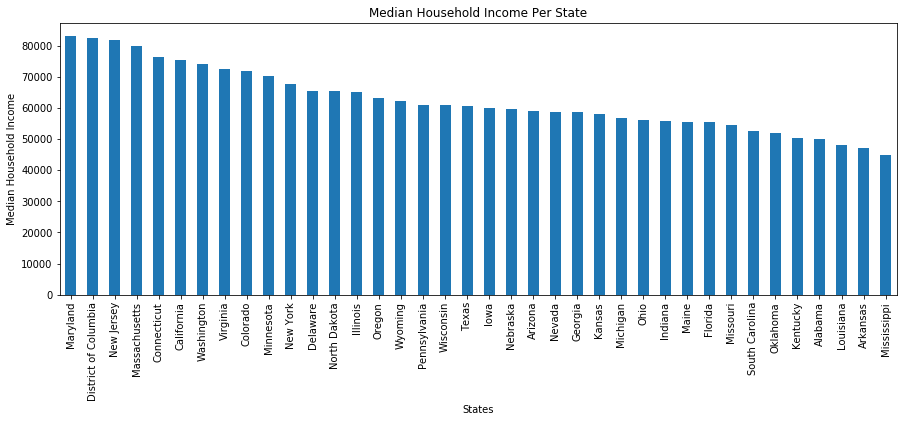

<Figure size 432x288 with 0 Axes>

In [6]:
# Bar graph
state_median_income= state_groupby['Median Household Income'].mean()

data_to_plot= pd.DataFrame(state_median_income)
data_to_plot= data_to_plot.sort_values(['Median Household Income'], ascending=False)

state_household_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(15,5))
state_household_chart.set_xlabel('States')
state_household_chart.set_ylabel('Median Household Income')
state_household_chart.set_title('Median Household Income Per State')

plt.savefig('images/Bry/bar_chart1.pdf')
plt.show()
plt.tight_layout()

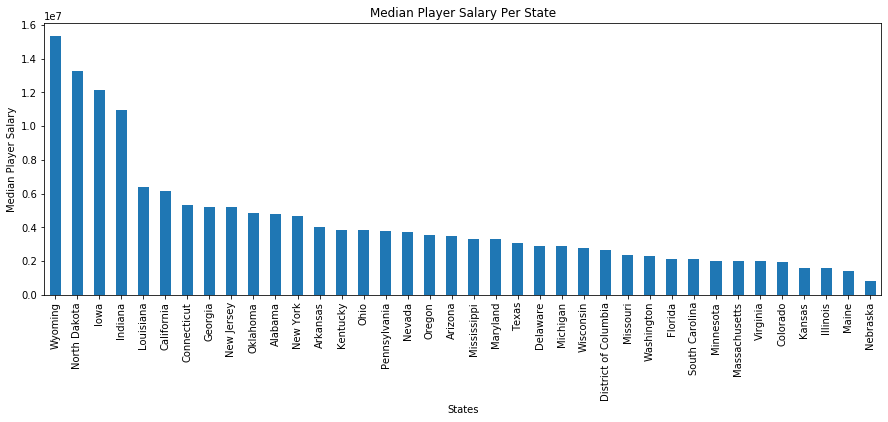

<Figure size 432x288 with 0 Axes>

In [7]:
#Bar graph
data_to_plot= pd.DataFrame(state_groupby['Player Salary'].median())
data_to_plot= data_to_plot.sort_values(['Player Salary'], ascending=False)

state_salary_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(15,5))
state_salary_chart.set_xlabel('States')
state_salary_chart.set_ylabel('Median Player Salary')
state_salary_chart.set_title('Median Player Salary Per State')

plt.savefig('images/Bry/bar_chart2.pdf')
plt.show()
plt.tight_layout()

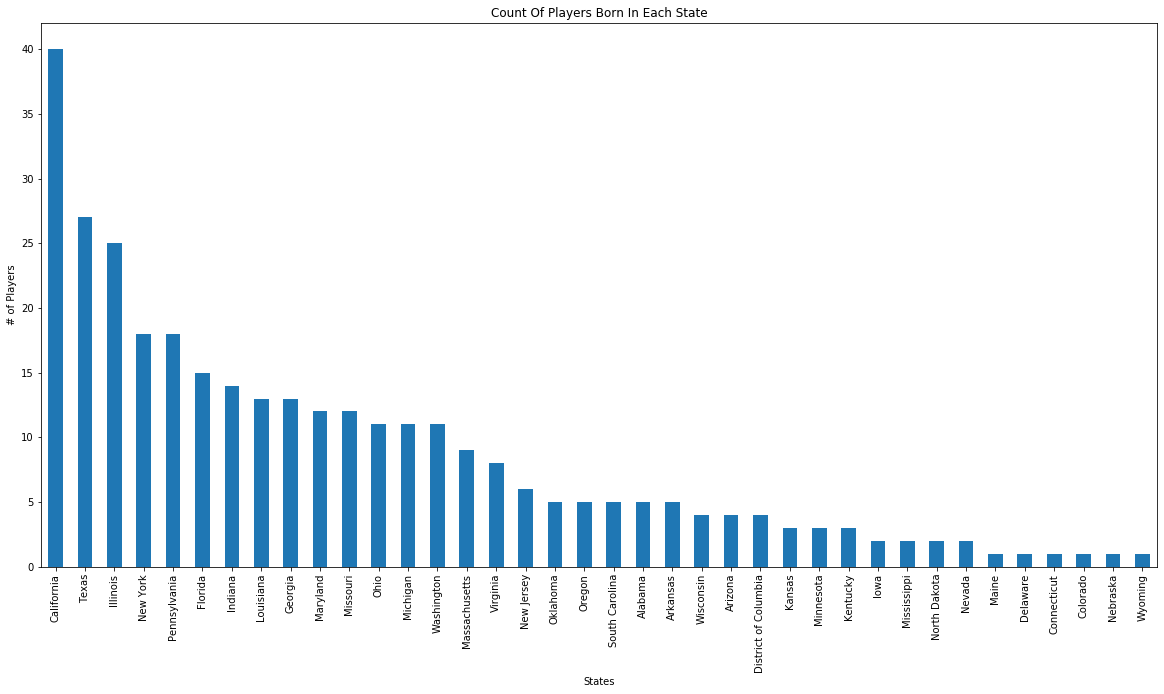

<Figure size 432x288 with 0 Axes>

In [8]:
# Bar graph
state_player_count= state_groupby['Player'].count()

data_to_plot= pd.DataFrame(state_player_count)
data_to_plot= data_to_plot.sort_values(['Player'], ascending=False)


state_player_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(20,10))
state_player_chart.set_xlabel('States')
state_player_chart.set_ylabel('# of Players')
state_player_chart.set_title('Count Of Players Born In Each State')

plt.savefig("images/Bry/bar_chart3.pdf")
plt.show()
plt.tight_layout()

The correlation between both factors is -0.19


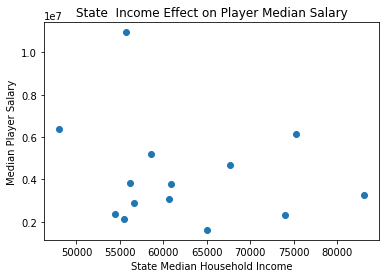

In [9]:
# Scatter plot
state_sort_player= state_groupby_df.sort_values(['# of Players Birthstate'], ascending= False)

x_data= state_sort_player.iloc[0:14,0]
y_data= state_sort_player.iloc[0:14,3]
correlation = st.pearsonr(x_data,y_data)
plt.scatter(x_data,y_data)
plt.xlabel('State Median Household Income')
plt.ylabel('Median Player Salary')
plt.title('State  Income Effect on Player Median Salary')
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('images/Bry/scatter_plot1.pdf')
plt.show()

The correlation between both factors is 0.28


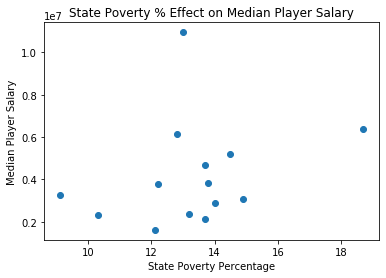

In [14]:
# Scatter plot
x_data= state_sort_player.iloc[0:14,4]
y_data= state_sort_player.iloc[0:14,3]

correlation = st.pearsonr(x_data,y_data)

plt.scatter(x_data,y_data)

plt.title('State Poverty % Effect on Median Player Salary')
plt.xlabel('State Poverty Percentage')
plt.ylabel('Median Player Salary')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('images/Bry/scatter_plot2.pdf')
plt.show()

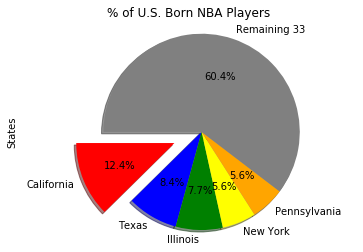

In [11]:
# Pie chart
labels= ['California', 'Texas', 'Illinois','New York', 'Pennsylvania', 'Remaining 33']
sizes= [40, 27, 25, 18, 18, 195]
colors= ['red', 'blue', 'green', 'yellow', 'orange', 'grey']
explode= [0.3,0,0,0,0,0]

# Design pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct= "%1.1f%%", shadow=True, startangle= 180)
plt.title('% of U.S. Born NBA Players')
plt.ylabel('States')

# show chart
plt.axis('equal')

# Save figure and show
plt.savefig('images/Bry/pie_chart.pdf')
plt.show()

In [12]:
# Box plot calculations

# List of states to loop through to find player salary data
state_list= ['California', 'Texas', 'Illinois', 'New York', 'Pennsylvania']

# Store salary information in an empty list after for loop
salary_list= []

# Loop through each state to gather data and run outlier calculations
for state in state_list: 
    
    # Search through dataframe to gather player salary data by state
    salary_series= merged_salary.loc[merged_salary['State']== state, 'Player Salary']
    
    # Add subset to salary list
    salary_list.append(salary_series)
    
    # Calculate any outliers present in the data
    quartiles = salary_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print any potential outliers
    print(f" {state}'s potential outliers: {salary_series[(salary_series > upper_bound) | (salary_series < lower_bound)]}")

 California's potential outliers: Series([], Name: Player Salary, dtype: int64)
 Texas's potential outliers: 282    32742000
287    26000000
Name: Player Salary, dtype: int64
 Illinois's potential outliers: 91    27093019
Name: Player Salary, dtype: int64
 New York's potential outliers: 208    27093019
216    32742000
224    31034483
Name: Player Salary, dtype: int64
 Pennsylvania's potential outliers: 257    33296296
Name: Player Salary, dtype: int64


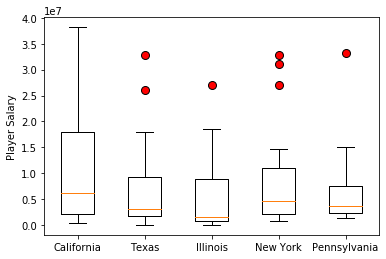

In [13]:
# Generating Box plot
salary_plot= salary_list

fig1, ax1= plt.subplots()
ax1.set_ylabel('Player Salary')

flierprops= dict(marker= 'o', markerfacecolor='r', markersize=8, linestyle='none')

ax1.boxplot(salary_plot, flierprops=flierprops, labels= ['California', 'Texas', 'Illinois', 'New York', 'Pennsylvania'])

plt.savefig('images/Bry/box_plot.pdf')
plt.show()

# Player Outliers Info
#### Jimmy Butler born in Houston, Texas with a contract value of 32,742,000

#### LaMarcus Aldridge born in Dallas, Texas with a contract value of 26,000,000

#### Anthony Davis born in Chicago, Illinois with a contract value of 27,093,019

#### Andre Drummond born in Mount Vernon, New York with a contract value of 27,093,019

#### Kemba Walker born in The Bronx, New York with a contract value of 32,742,000

#### Tobias Harris born in Islip, New York with a contract value of 31,034,483

#### Kyle Lowry born in Philadelphia, Pennsylvania with a contract value of 33,296,296

In [42]:
# Locate outlier data and show

#merged_salary.iloc[282:283, :]
#merged_salary.iloc[287:288, :]
#merged_salary.iloc[91:92,:]
#merged_salary.iloc[208:209,:]
#merged_salary.iloc[216:217, :]
#merged_salary.iloc[224:225, :]
#merged_salary.iloc[257:258, :]

,State,"Poverty Percent, All Ages",Median Household Income,Player,Date,City,Player Salary
257,Pennsylvania,12.2,60891,Kyle Lowry,Mar 25 1986,Philadelphia,33296296
